## Grade students

Problem: Predict IQ of child based on IQ of mother

In [67]:
# Prepare data
import pandas as pd

kids = pd.read_csv("../data/kid_iq.csv")

# kid_score : child IQ
# mom_hs : mom's education
# mom_iq : mom IQ
# mom_work : mom's work
# mom_age : mom' age

kids.head()

,id,kid_score,mom_hs,mom_iq,mom_work,mom_age
0,1,65,1,121.117529,4,27
1,2,98,1,89.361882,4,25
2,3,85,1,115.443165,4,27
3,4,83,1,99.449639,3,25
4,5,115,1,92.745710,4,27


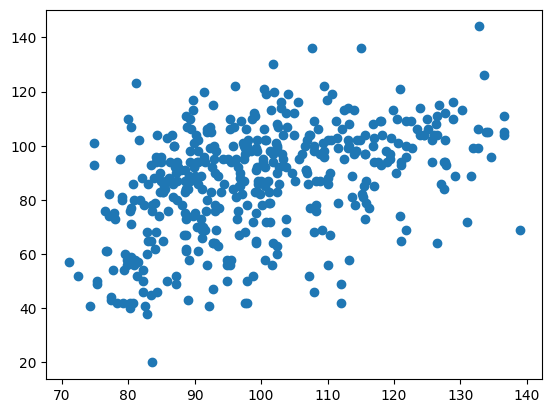

In [68]:
# display data
import matplotlib.pyplot as plt

plt.scatter('mom_iq', 'kid_score', data=kids)

In [105]:
# split in test and training data
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np

X = kids['mom_iq'].to_numpy().reshape(-1, 1)
y = kids['kid_score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [118]:
# linear regression

lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

pred = lin_reg.predict(X_test)

In [120]:
# polymonial regression

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

pipeline = make_pipeline(PolynomialFeatures(2), LinearRegression())

pipeline.fit(X_train,y_train)
pred = pipeline.predict(X_test)

In [119]:
# mean error
mse = np.sqrt(mean_squared_error(y_test,pred))
print(f'Mean error: {mse:3.3} ({mse/np.mean(pred)*100:3.3}%)')

# model determination
score = pipeline.score(X_train,y_train)
print('Model determination: ', score)

Mean error: 19.5 (22.7%)
Model determination:  0.21084425271634366


ValueError: x and y must be the same size

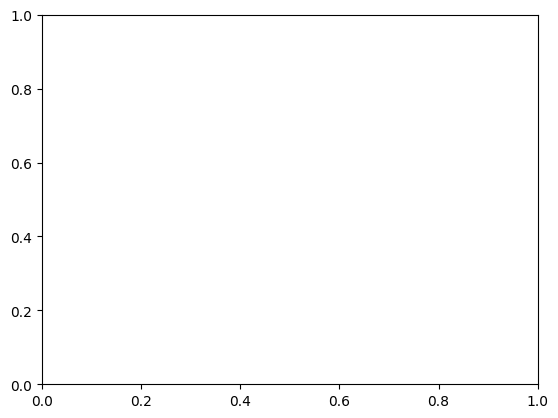

In [95]:
# show graph

plt.scatter(X_test, y_test, color='black')
plt.scatter(X_test, pred, color='red')

plt.xlabel("Mom's IQ")
plt.ylabel("Kid's IQ")
plt.title("A Graph Plot Showing Kid's IQ against Mom's IQ")
plt.show()

In [74]:
# test:

pipeline.predict([[200]])

array([60.55515788])

In [117]:
# now, we will try including mom's age to improve the model's accuracy

X = kids[['mom_iq', 'mom_age']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train
y_train

80      94
369     84
342     64
301     43
112    122
      ... 
129     69
340     41
353     84
390    102
246     80
Name: kid_score, Length: 347, dtype: int64